<a href="https://colab.research.google.com/github/pbarizza/ML-course-2025/blob/main/lesson05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 5#
**Machine leaning**

**05-Jul-2025**

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [70]:
df_train = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/test.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/gender_submission.csv')

In [71]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
# Impute missing values for Age, Fare, Embarked
df_train['Age'] = df_train.Age.fillna(df_train.Age.median())
df_train['Fare'] = df_train.Fare.fillna(df_train.Fare.median())
df_train['Embarked'] = df_train['Embarked'].fillna('S')
# encode non numberical data
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

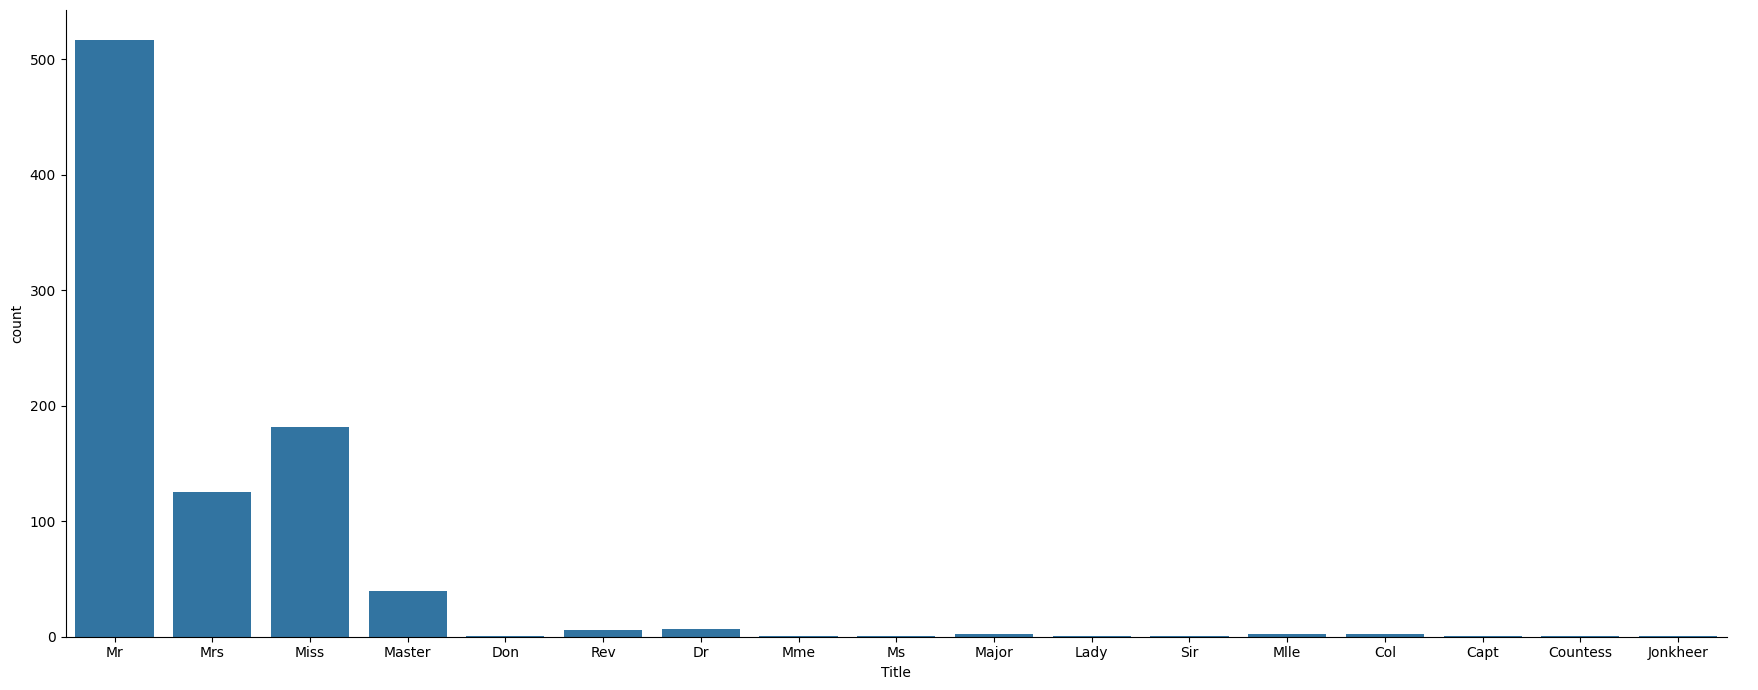

In [95]:
df_train['Name']
df_train['Title']  = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# encode Title with get_dummies
#df_train = pd.get_dummies(df_train, columns=['Title'], drop_first=True)
df_train['Title'].value_counts()
# cat plot title
sns.catplot(x='Title', kind='count', data=df_train, height=7, aspect=2.5)


In [89]:
# replace some of the title with 'rare'
df_train['Title'] = df_train['Title'].replace(['Mlle','Ms'],'Miss')
df_train['Title'] = df_train['Title'].replace(['Mme','Ms'],'Mrs')
df_train['Title'] = df_train['Title'].replace(['Capt','COl','Major','Rev','Jonkheer','Don','Sir','Countess','Lady','Dona'],'Rare')

In [94]:
# family size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [96]:
df_train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
...,...
Title_Ms,0
Title_Rev,0
Title_Sir,0
Title,0


In [74]:
# split data
features = ['Pclass','Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df_train[features]
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Mr'

In [ ]:
confusion_matrix(y_test, y_pred)






In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
precision_score(y_test, y_pred)

In [ ]:
recall_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
y_test_list = list(y_test)
y_pred_list = list(y_pred)
df_results = X_test.copy()
df_results['y_test'] = y_test_list
df_results['y_pred'] = y_pred_list

TP = TN = FP = FN = 0

for i, row in df_results.iterrows():
    actual = row['y_test']
    pred = row['y_pred']
    if actual == 1 and pred == 1:
        TP += 1
    elif actual == 0 and pred == 0:
        TN += 1
    elif actual == 0 and pred == 1:
        FP += 1
    elif actual == 1 and pred == 0:
        FN += 1

total = TP + TN + FP + FN
accuracy = (TP + TN) / total

y_probs = model.predict_proba(X_test)

y_probs = y_probs[:, 1]

for t in [0.2, 0.4, 0.5, 0.6, 0.8]:
    y_pred_t = (y_probs >= t).astype(int)
    print(f"--- Threshold: {t} ---")
    print(confusion_matrix(y_test, y_pred_t))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
auc_score = roc_auc_score(y_test, y_probs)
auc_score

In [ ]:
# Youden's J = TPR - FPR
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]
print("Best Threshold:", best_threshold)

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (Recall / TPR)')
plt.title('ROC Curve with Threshold Annotations')